In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
# # Specify the path to your pickle file
# file_path = "../../../dataset/cri_compustat_merged_v8.pkl"

# # Open the pickle file for reading
# with open(file_path, 'rb') as file:
#     # Load the data from the pickle file
#     df_full = pickle.load(file)

In [3]:
from google.oauth2 import service_account
import pandas_gbq as gbq 
import json
from pandas_gbq import to_gbq, read_gbq

credentials_path = '../../../token.json'

# Authenticate with your credentials
credentials = service_account.Credentials.from_service_account_file(
    credentials_path, scopes=['https://www.googleapis.com/auth/bigquery'])

# Set the credentials for pandas_gbq
gbq.context.credentials = credentials

In [4]:
# import dataframe from GBQ

df_full = read_gbq(f"""

SELECT *
FROM capstone-402105.capstone.cri_compustat_yfinance_data

""",project_id='capstone-402105', dialect='standard')

Downloading: 100%|██████████|


In [33]:
df_full.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'StartDate',
       'EventDate', 'Default_1', 'Default_3', 'Default_6', 'Default_12',
       'Default_24', 'Default_36', 'Default_60', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 

In [72]:
df = df_full.copy()

In [73]:
import datetime
import pytz

df.sort_values(by='EventDate', inplace=True)

#Split data into train, validation and test 
date2022 = datetime.datetime(2022, 1, 1).replace(tzinfo=pytz.UTC)
date2020 = datetime.datetime(2020,1,1).replace(tzinfo=pytz.UTC)
train_df = df[df["EventDate"] < date2020]
val_df = df[(df["EventDate"] >= date2020) & (df["EventDate"] < date2022)]
test_df = df[df["EventDate"] >= date2022]

In [74]:
df.describe()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio,Rolling_Sortino,macd,macd_h,macd_s,rsi
count,579815.0,579815.000000,579815.0,579815.000000,579815.000000,579815.000000,579815.000000,579815.000000,579815.000000,579815.000000,...,5.798150e+05,5.798150e+05,5.798150e+05,579815.000000,579815.000000,579815.000000,5.798150e+05,5.798150e+05,5.798150e+05,579815.000000
mean,38090.511918,2012.140783,6.513315,0.062076,-0.006332,4.834042,-0.002940,0.644890,-0.007346,-0.002482,...,-4.146300e+04,-7.459050e+05,-7.385284e+05,-19457.365745,-16342.460899,0.124072,-4.942828e+03,4.736845e+02,-5.416513e+03,53.683951
std,11377.716602,6.165273,3.450909,0.169826,0.006107,3.062458,1.288000,0.798840,0.263788,0.038245,...,4.632728e+05,3.969754e+06,3.946962e+06,50178.724283,67969.414248,0.424558,4.493841e+05,7.970173e+04,4.627129e+05,16.600795
min,22043.0,2000.000000,1.0,-0.545579,-0.012097,-1.113511,-35.341088,-4.156714,-2.559415,-1.324832,...,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000,-3.668555,-7.579692e+07,-1.979324e+07,-6.776329e+07,0.000000
25%,29551.0,2007.000000,4.0,-0.020346,-0.011189,2.672273,-0.645188,0.000000,-0.073359,-0.001063,...,2.028550e+01,-7.487303e+01,-7.065115e+01,-2.772098,1.591837,-0.146532,-8.683099e-01,-3.123225e-01,-7.807702e-01,41.478064
50%,34696.0,2012.000000,6.0,0.089689,-0.008279,4.290945,0.013210,0.543089,0.000000,0.002725,...,3.482704e+01,-5.277760e+01,-4.685100e+01,-0.526545,5.633588,0.123174,1.921574e-01,4.905889e-02,2.057825e-01,53.150919
75%,44597.0,2017.000000,10.0,0.154631,-0.004017,6.431807,0.673169,1.092096,0.062196,0.006348,...,5.383416e+01,-2.447970e+01,-1.554867e+01,-0.090107,16.083321,0.393310,1.849526e+00,4.935565e-01,1.772713e+00,65.616517
max,93119.0,2023.000000,12.0,0.713380,0.011896,57.489603,14.933724,4.787727,2.683886,0.216094,...,2.669000e+05,5.337000e+05,5.158000e+05,5576.666667,132673.500000,4.643673,1.413573e+06,9.948563e+06,1.078488e+06,100.000000


In [75]:
print(df.shape)

(579815, 61)


c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future ve

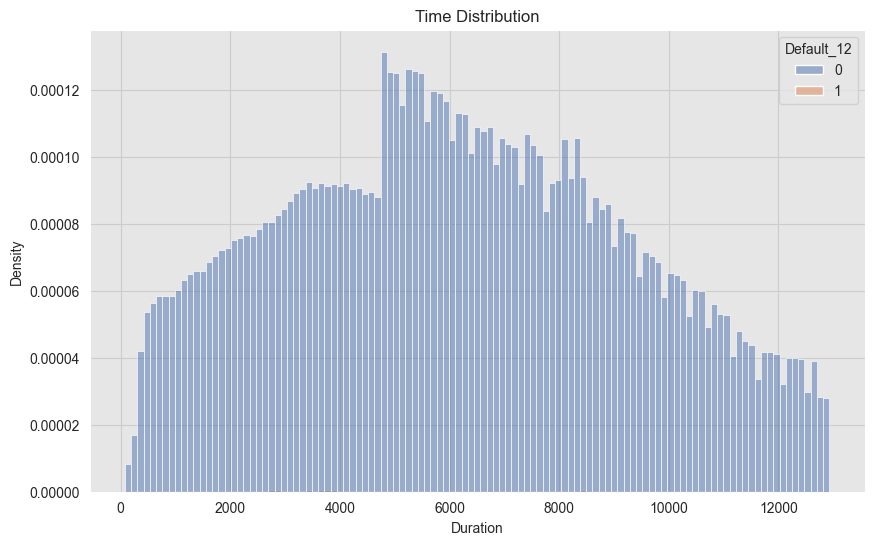

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='Duration', hue='Default_12', stat='density', ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


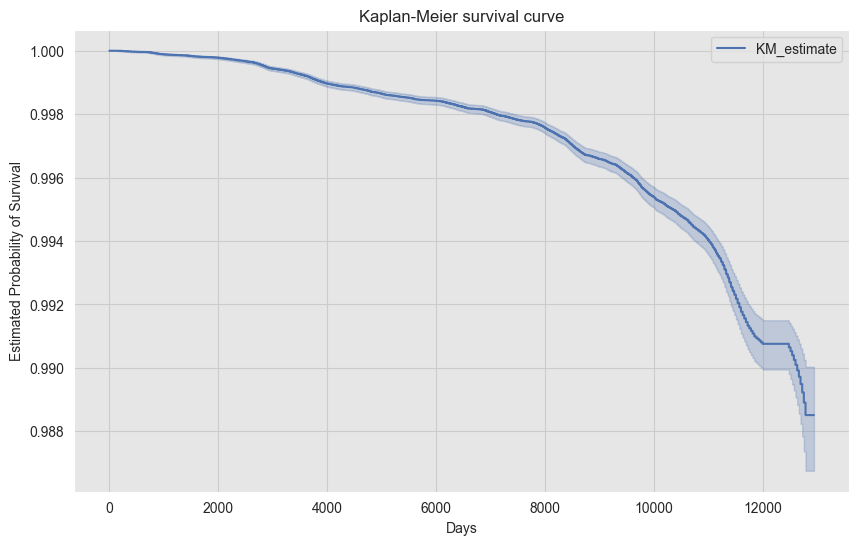

In [77]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['Duration'], event_observed=df['Default_12'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [78]:
# make a correlation matrix
correlation_matrix = df.corr()

# Print pairs of features with correlations above 0.9
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")


C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\1049231920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlations above 0.9:
Columns DTDmedianFin and dummy297fin have a correlation of 0.9347676185716377
Columns dummy297fin and DTDmedianFin have a correlation of 0.9347676185716377
Columns current_ratio and quick_ratio have a correlation of 0.9999800782439431
Columns quick_ratio and current_ratio have a correlation of 0.9999800782439431
Columns net_profit_margin and operating_profit_margin have a correlation of 0.9725500872089582
Columns net_profit_margin and ebitda_margin have a correlation of 0.9537083110706308
Columns operating_profit_margin and net_profit_margin have a correlation of 0.9725500872089582
Columns operating_profit_margin and ebitda_margin have a correlation of 0.979912544145254
Columns ebitda_margin and net_profit_margin have a correlation of 0.9537083110706308
Columns ebitda_margin and operating_profit_margin have a correlation of 0.979912544145254
Columns macd and macd_s have a correlation of 0.9851523687573479
Columns macd_s and macd have a correlation of 0.985152368

In [79]:
#Drop feature that causes high correlation to be able to run model without multicorrelation error
df.drop(["quick_ratio", "operating_profit_margin", "ebitda_margin", "dummy297fin", "DTDmedianNonFin", "macd_s"], axis=1, inplace=True)

In [80]:
#Ensure there are no more highly correlated pairs
correlation_matrix = df.corr()
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")

C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\1354625380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


No correlations above 0.9 found.


In [81]:
df.drop(["year", "month", "gvkey", "StartDate", "tic", 'Default_1', 'Default_3', 'Default_6',
        'Default_24', 'Default_36', 'Default_60',], axis=1, inplace=True)

In [96]:
import datetime
import pytz

df.sort_values(by='EventDate', inplace=True)

#Split data into train, validation and test 
date2022 = datetime.datetime(2022, 1, 1).replace(tzinfo=pytz.UTC)
date2020 = datetime.datetime(2020,1,1).replace(tzinfo=pytz.UTC)
train_df = df[df["EventDate"] < date2020]
val_df = df[(df["EventDate"] >= date2020) & (df["EventDate"] < date2022)]
test_df = df[df["EventDate"] >= date2022]

In [97]:
test_df.groupby('Default_12')["CompNo"].count()

Default_12
0    33509
1      119
Name: CompNo, dtype: int64

In [98]:
119/(33509+119)

0.0035387177352206494

In [99]:
train_df.groupby("Default_12")["CompNo"].count()

Default_12
0    492317
1      1073
Name: CompNo, dtype: int64

In [100]:
1073/(492317+1073)

0.0021747501976124364

In [101]:
val_df.groupby('Default_12')["CompNo"].count()

Default_12
0    52647
1      150
Name: CompNo, dtype: int64

In [102]:
150/(52647+150)

0.0028410705153701916

In [103]:
print(train_df.columns)


Index(['CompNo', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'EventDate', 'Default_12', 'Duration', 'current_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'Rolling_Sortino', 'macd', 'macd_h', 'rsi'],
      dtype='object')


In [104]:
train_df.drop(["CompNo", "EventDate"], axis=1, inplace=True)
val_df.drop(["CompNo", "EventDate"], axis=1, inplace=True)
test_df.drop(["CompNo", "EventDate"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\3097251762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(["CompNo", "EventDate"], axis=1, inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\3097251762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.drop(["CompNo", "EventDate"], axis=1, inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\3097251762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [105]:
train_df.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio,Rolling_Sortino,macd,macd_h,rsi
210836,-0.097569,0.011896,5.064704,-0.346234,-0.005617,0.348491,0.008829,0.000506,3.802349,0.091062,...,151.041667,0.000000,1.000000,42.558923,-0.760578,15.012500,-0.250149,-0.159626,-0.071936,32.984293
210723,-0.097569,0.011896,4.522199,-1.346558,2.652498,-0.106761,0.006805,-0.000099,1.760244,0.584114,...,373.263889,0.000000,1.000000,44.346514,-149041.103448,141.333333,0.648029,10.269377,2.834381,78.157720
210724,-0.097569,0.011896,4.128308,-0.318026,1.756623,-0.276636,0.006592,0.000789,-2.735725,-0.153184,...,72.321429,0.714286,0.285714,45.492461,-13.319149,2176.000000,0.289796,0.015216,0.000794,66.666667
210725,-0.097569,0.011896,6.562584,-1.102111,2.039809,-0.028231,0.016961,0.000205,1.391961,0.137735,...,123.913043,0.000000,1.000000,33.234250,-149041.103448,2.643715,0.556013,3.416576,0.516442,79.672781
210726,-0.097569,0.011896,3.775843,0.636562,1.135509,0.102102,0.012381,0.000819,0.470547,0.111553,...,114.204545,0.000000,1.000000,6.271480,-23.226804,73.600000,-0.399510,-0.591355,-0.161870,26.315789


In [106]:
train_X = train_df
train_X.dropna(inplace=True)
val_X = val_df
val_X.dropna(inplace=True)
test_X = test_df
test_X.dropna(inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\890013741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X.dropna(inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\890013741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_X.dropna(inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_25404\890013741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X.dropna(inplace=True)


In [107]:
train_X.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio,Rolling_Sortino,macd,macd_h,rsi
210836,-0.097569,0.011896,5.064704,-0.346234,-0.005617,0.348491,0.008829,0.000506,3.802349,0.091062,...,151.041667,0.000000,1.000000,42.558923,-0.760578,15.012500,-0.250149,-0.159626,-0.071936,32.984293
210723,-0.097569,0.011896,4.522199,-1.346558,2.652498,-0.106761,0.006805,-0.000099,1.760244,0.584114,...,373.263889,0.000000,1.000000,44.346514,-149041.103448,141.333333,0.648029,10.269377,2.834381,78.157720
210724,-0.097569,0.011896,4.128308,-0.318026,1.756623,-0.276636,0.006592,0.000789,-2.735725,-0.153184,...,72.321429,0.714286,0.285714,45.492461,-13.319149,2176.000000,0.289796,0.015216,0.000794,66.666667
210725,-0.097569,0.011896,6.562584,-1.102111,2.039809,-0.028231,0.016961,0.000205,1.391961,0.137735,...,123.913043,0.000000,1.000000,33.234250,-149041.103448,2.643715,0.556013,3.416576,0.516442,79.672781
210726,-0.097569,0.011896,3.775843,0.636562,1.135509,0.102102,0.012381,0.000819,0.470547,0.111553,...,114.204545,0.000000,1.000000,6.271480,-23.226804,73.600000,-0.399510,-0.591355,-0.161870,26.315789


In [108]:
print(train_X.columns)

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'Default_12', 'Duration', 'current_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'Rolling_Sortino', 'macd', 'macd_h', 'rsi'],
      dtype='object')


In [122]:
# Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'Duration', event_col='Default_12', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][365.0]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_X['Default_12'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_X['Default_12'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column equity_ratio have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Default_12'].astype(bool)
>>> print(df.loc[events, 'equity_ratio'].var())
>>> print(df.loc[~events, 'equity_ratio'].var())

A very low variance means that the column equity_ratio completely determines whether a subject dies or not. See https://stats.st

In [110]:
# Assuming you have a DataFrame named train_X

# Count how many rows have "Default" equal to 0
count_default_0 = (train_X['Default_12'] == 0).sum()

# Count how many rows have "Default" equal to 1
count_default_1 = (train_X['Default_12'] == 1).sum()

# Print the counts
print("Count of Default == 0:", count_default_0)
print("Count of Default == 1:", count_default_1)


Count of Default == 0: 492317
Count of Default == 1: 1073


In [111]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [112]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [113]:
cph_list[16]

{'cph': <lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 0}

In [114]:
cph_list[17]

{'cph': <lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [115]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>
             duration col = 'Duration'
                event col = 'Default_12'
                penalizer = 0.7
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 493390
number of events observed = 1073
   partial log-likelihood = -13095.95
         time fit was run = 2023-11-10 11:56:53 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
StkIndx                      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
STInt                        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdlevel                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdtrend                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfinlevel               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfintrend               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2talevel                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2tatrend                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizelevel                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizetrend                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
m2b                          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sigma                         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqfinlevel                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
lqfintrend                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianFin                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_ratio                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin             0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
return_on_assets              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
asset_turnover               -0.00       1.00       0.00            -0.00             0.00          

In [116]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(493390,)

In [117]:
roc_auc_score(train_df['Default_12'], x_pred)

0.5

In [118]:
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(33628,)

In [119]:
roc_auc_score(test_df['Default_12'], test_x_pred)


0.5

In [120]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(test_df['Default_12'], test_x_pred)

# Calculate the area under the precision-recall curve (PRAUC)
prauc = auc(recall, precision)

print('PRAUC:', prauc)

ap = average_precision_score(test_df['Default_12'], test_x_pred)
print('average_precision_score', ap)


PRAUC: 0.5017693588676103
average_precision_score 0.0035387177352206494
